Accuracy of MLP on winequality-white: 0.7197278911564626
Accuracy of MLP on winequality-red: 0.7020833333333333


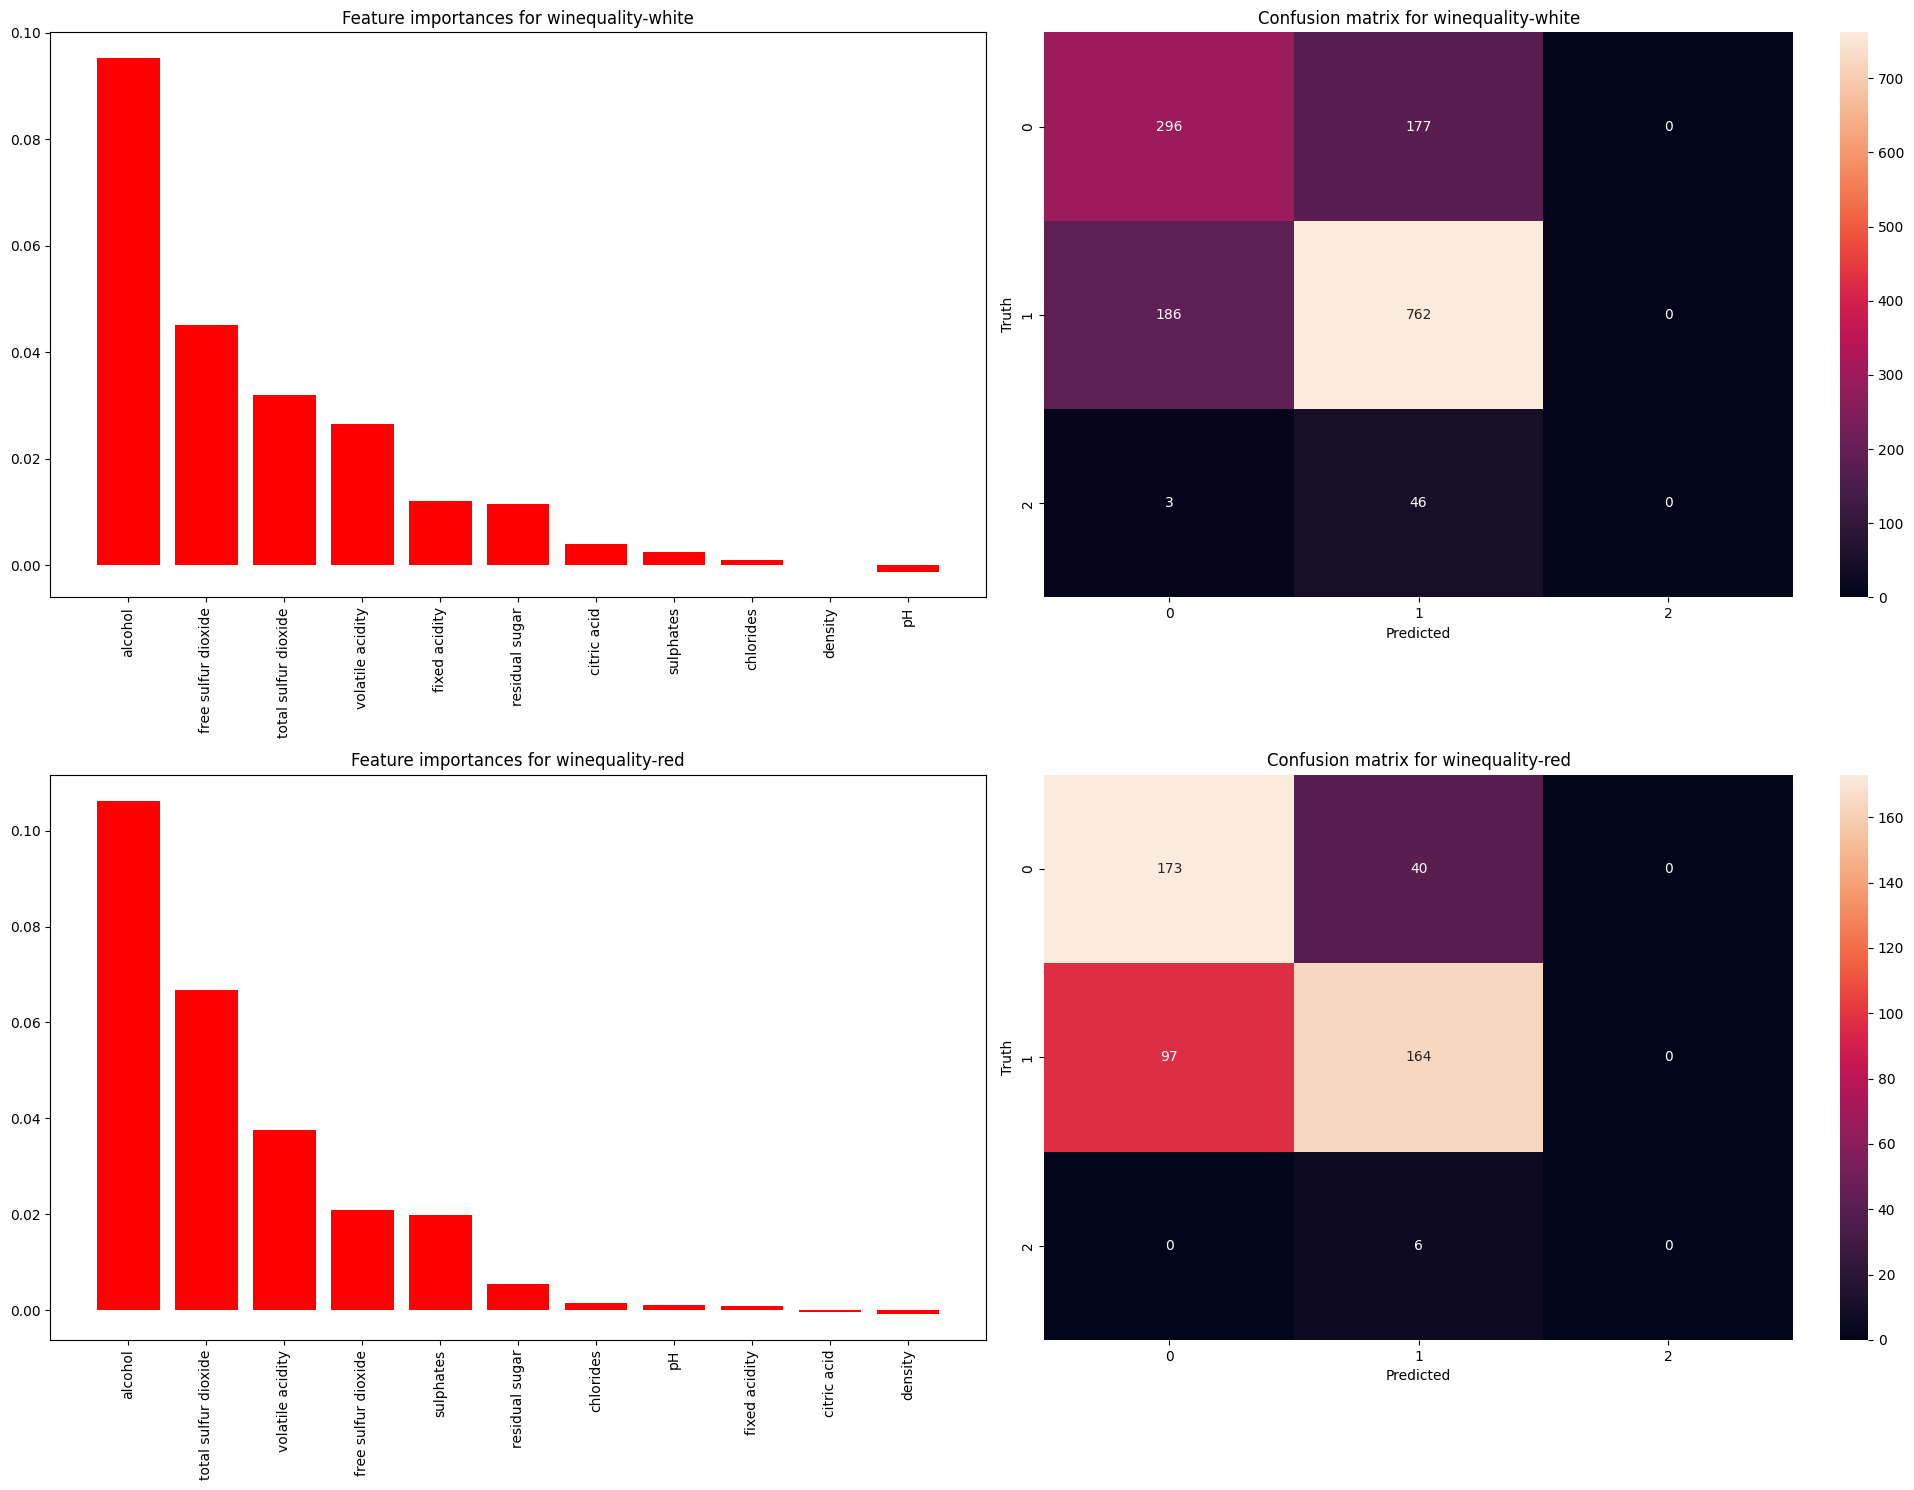

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))
for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    bins = [0, 5, 7, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = MLPClassifier(hidden_layer_sizes=(100,3), max_iter=2000, random_state=42)  # Set the hidden layer sizes and max iterations

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of MLP on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

Accuracy of MLP on winequality-white: 0.7074829931972789
Accuracy of MLP on winequality-red: 0.7125


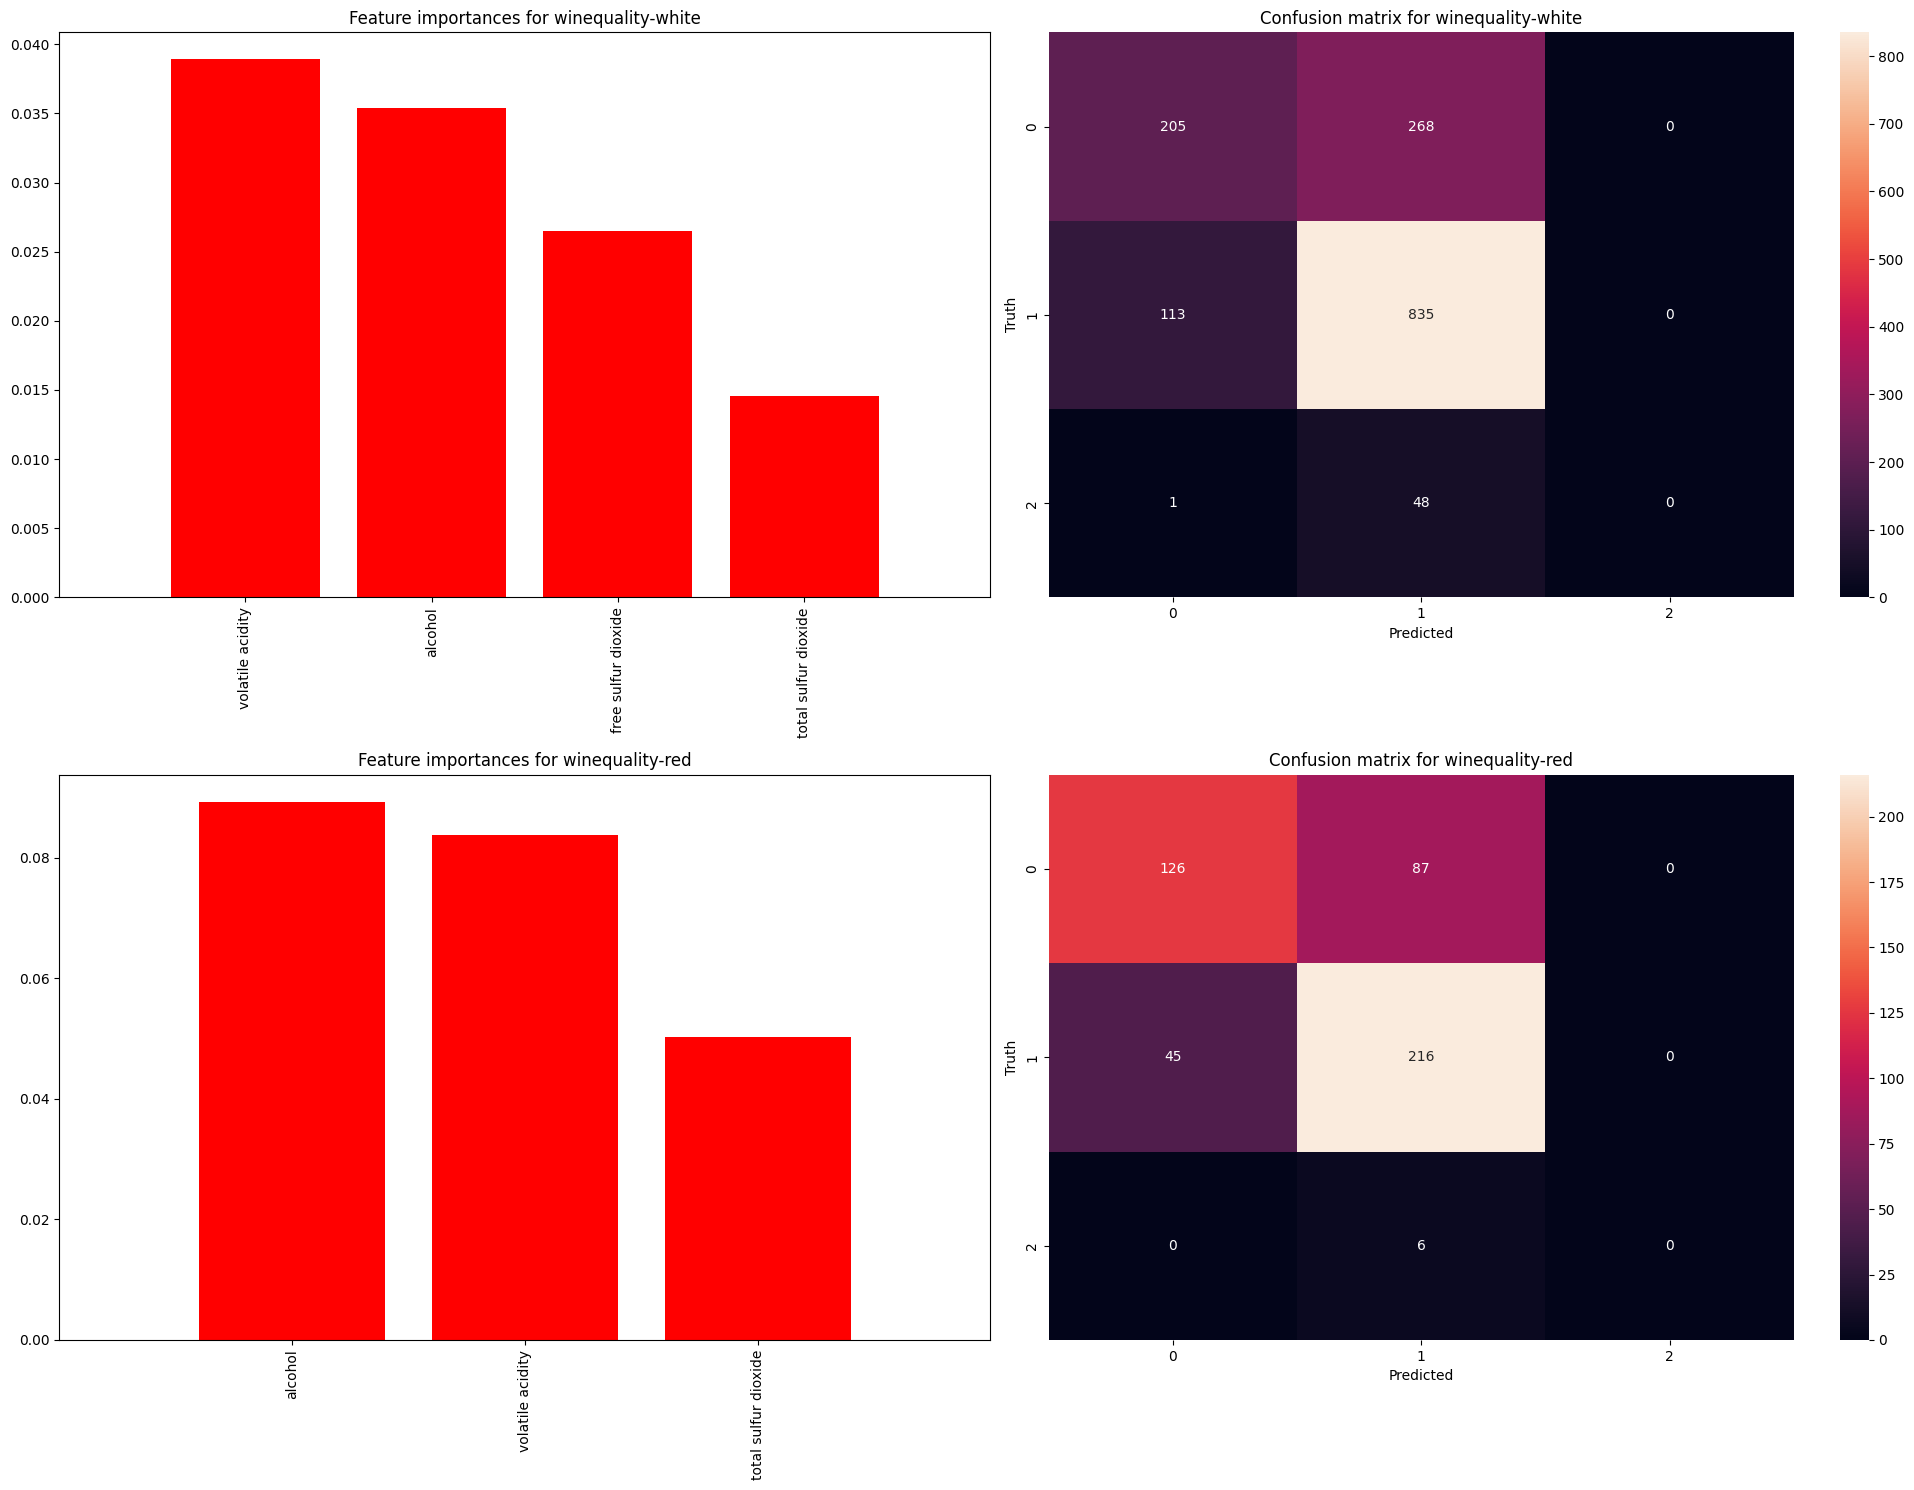

In [21]:
fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))
for i, (dataset_name, df) in enumerate(datasets.items()):
    if dataset_name == "winequality-red":
        selected_columns = ['alcohol', 'total sulfur dioxide', 'volatile acidity']
    elif dataset_name == "winequality-white":
        selected_columns = ["alcohol", "free sulfur dioxide", "total sulfur dioxide", "volatile acidity"]
    X = df[selected_columns]
    y = df.iloc[:, -1]
    bins = [0, 5, 7, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = MLPClassifier(hidden_layer_sizes=(100,3), max_iter=2000, random_state=42)  # Set the hidden layer sizes and max iterations

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of MLP on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

Selecting only the most crucial features did not yield a significant improvement. The outcome showed only a marginal decrease in accuracy for white wine and a slight increase for red wine. Overall, the results remained fairly consistent across both datasets.

Accuracy of MLP on winequality-white: 0.746938775510204
Accuracy of MLP on winequality-red: 0.7375


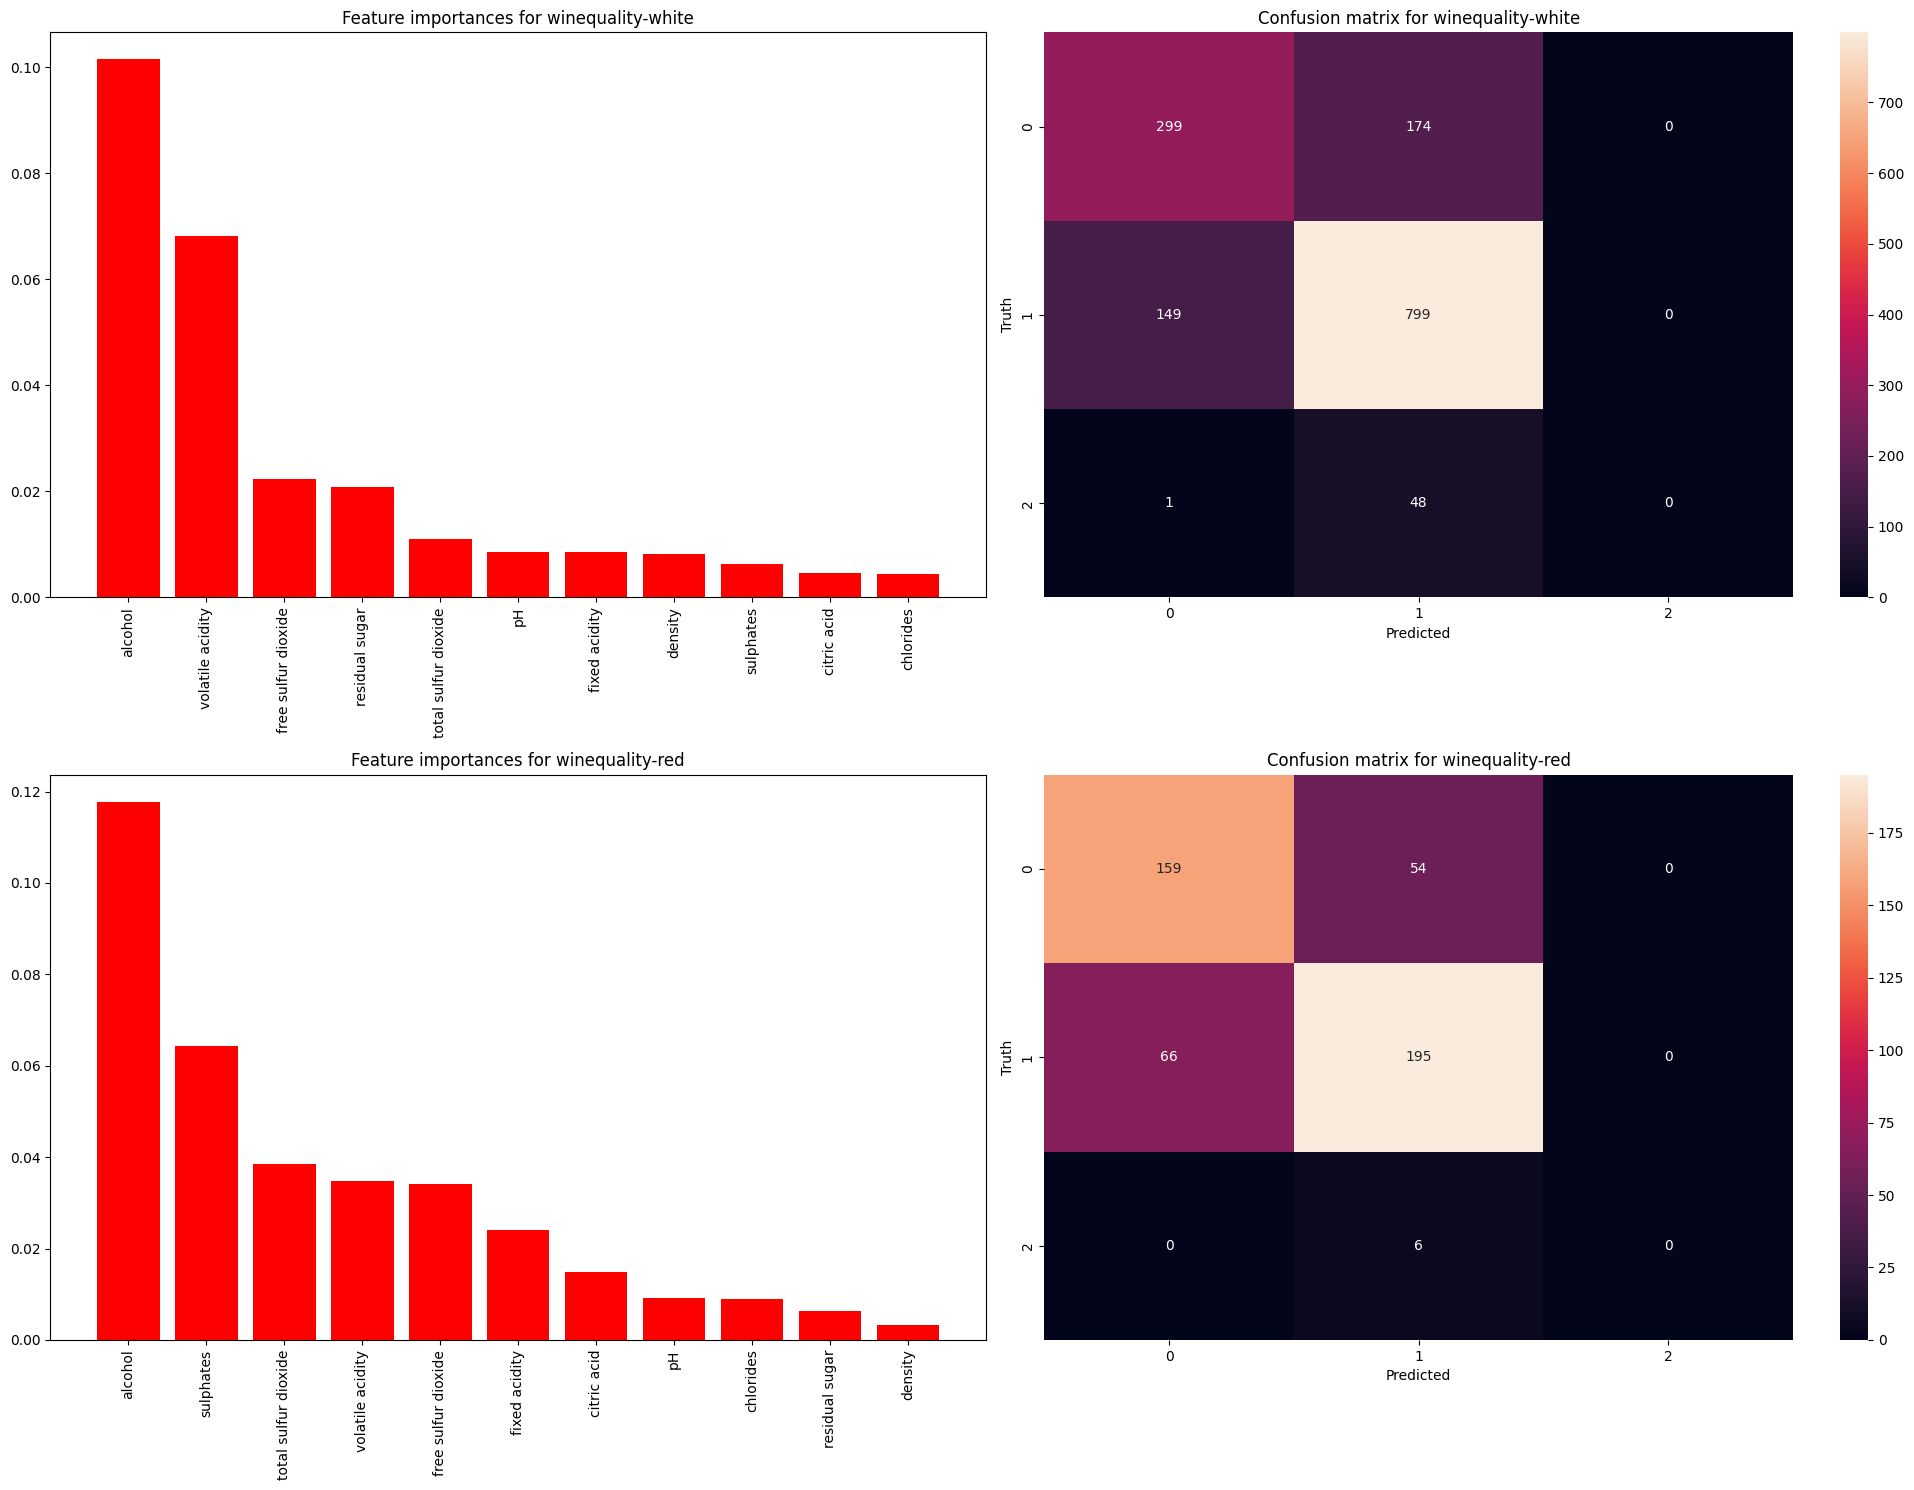

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler

import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))
for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    bins = [0, 5, 7, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns=df.columns[:-1])  # Convert X back to DataFrame

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = MLPClassifier(hidden_layer_sizes=(100,3), max_iter=2000, random_state=42)  # Set the hidden layer sizes and max iterations

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of MLP on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

The normalization of the data has yielded a noticeable improvement.